In [8]:
import torchvision.transforms
from torch import nn
from doctr.datasets import SROIE
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
import torchvision
import cv2
import numpy as np

In [9]:
train_dataset = SROIE(train=True, use_polygons=True, download=True)
test_dataset = SROIE(train=False, use_polygons=True, download=True)

In [10]:
print([int(0.9 * len(train_dataset)) + 1, int( 0.1 * len(train_dataset))])
print(sum([int(0.9 * len(train_dataset)) + 1, int( 0.1 * len(train_dataset))]))
print(len(train_dataset))

[564, 62]
626
626


In [11]:
batch_size = 128

train_dataset, val_dataset = random_split(train_dataset, [int(0.9 * len(train_dataset)) + 1, int( 0.1 * len(train_dataset))])

train_loader = DataLoader(
    train_dataset,
    shuffle=True
)

val_loader = DataLoader(
    val_dataset,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    shuffle=True
)


A single batch of images has shape: torch.Size([1, 3, 1528, 1080])
A single RBG img has 3 channels, width 1528, and height 1080.
Size of a batch of imgs flattend with flatten: torch.Size([1, 4950720])
True


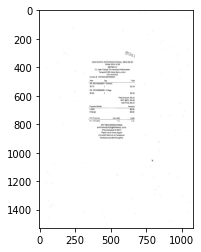

In [12]:
imgs, mask = next(iter(train_loader))
print(f'A single batch of images has shape: {imgs.size()}')
example_img = imgs[0]
c, w, h = example_img.size()
print(f'A single RBG img has {c} channels, width {w}, and height {h}.')

batch_flat_flatten = imgs.flatten(1)
print(f'Size of a batch of imgs flattend with flatten: {batch_flat_flatten.size()}')

d = example_img.flatten().size()[0]
print(c * w * h == d)

t = torchvision.transforms.ToPILImage()
plt.imshow(t(example_img))


In [13]:
labels = mask['labels']
boxes = mask['boxes']
print(f'A single batch of imgs has polygon shapes: {boxes.shape}')
print(f'Number of labels: {len(labels)}')
print(boxes)
print(labels)

A single batch of imgs has polygon shapes: torch.Size([1, 39, 4, 2])
Number of labels: 39
tensor([[[[0.3417, 0.2323],
          [0.6102, 0.2323],
          [0.6102, 0.2441],
          [0.3417, 0.2441]],

         [[0.4278, 0.2454],
          [0.5250, 0.2454],
          [0.5250, 0.2533],
          [0.4278, 0.2533]],

         [[0.4444, 0.2572],
          [0.5083, 0.2572],
          [0.5083, 0.2670],
          [0.4444, 0.2670]],

         [[0.3602, 0.2683],
          [0.5917, 0.2683],
          [0.5917, 0.2781],
          [0.3602, 0.2781]],

         [[0.3880, 0.2801],
          [0.5620, 0.2801],
          [0.5620, 0.2899],
          [0.3880, 0.2899]],

         [[0.4380, 0.2912],
          [0.5120, 0.2912],
          [0.5120, 0.3010],
          [0.4380, 0.3010]],

         [[0.3296, 0.3030],
          [0.4926, 0.3030],
          [0.4926, 0.3115],
          [0.3296, 0.3115]],

         [[0.3287, 0.3194],
          [0.3519, 0.3194],
          [0.3519, 0.3272],
          [0.3287, 0.3272]],

In [15]:
print(np.argmin(boxes))

tensor(1)


TypeError: Invalid shape (29, 4, 2) for image data

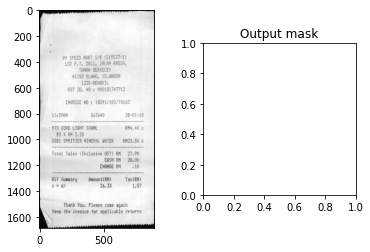

In [8]:
classes = boxes.shape[0] if len(boxes.shape) > 2 else 1

fig, ax = plt.subplots(1, classes + 1)
ax[0].imshow(t(example_img))
if classes > 1:
    for i in range(classes):
        ax[i + 1].set_title(f'Output mask (class {i + 1})')
        ax[i + 1].imshow(boxes[i, :, :])
else:
    ax[1].set_title('Output mask')
    ax[1].imshow(boxes[0, :, :, :])

plt.xticks([]), plt.yticks([])
plt.show()

[0.19955157 0.20581257]
[336.44394 183.58481]
[0.7544843  0.20581257]
[1272.0605   183.58481]
[0.7544843 0.2301305]
[1272.0605  205.2764]
[0.19955157 0.2301305 ]
[336.44394 205.2764 ]
[0.22197309 0.23309608]
[374.24664 207.9217 ]
[0.75336325 0.23309608]
[1270.1704  207.9217]
[0.75336325 0.25741398]
[1270.1704   229.61327]
[0.22197309 0.25741398]
[374.24664 229.61327]
[0.34192824 0.26453143]
[576.491   235.96204]
[0.6188341  0.26453143]
[1043.3542   235.96204]
[0.6188341  0.28410438]
[1043.3542  253.4211]
[0.34192824 0.28410438]
[576.491  253.4211]
[0.28587443 0.29418743]
[481.98428 262.4152 ]
[0.7029148  0.29418743]
[1185.1143  262.4152]
[0.7029148  0.31791222]
[1185.1143  283.5777]
[0.28587443 0.31791222]
[481.98428 283.5777 ]
[0.36547086 0.32443655]
[616.18384 289.3974 ]
[0.60201794 0.32443655]
[1015.00226  289.3974 ]
[0.60201794 0.3446026 ]
[1015.00226  307.38553]
[0.36547086 0.3446026 ]
[616.18384 307.38553]
[0.24551569 0.3529063 ]
[413.93945 314.79242]
[0.74215245 0.3529063 ]
[125

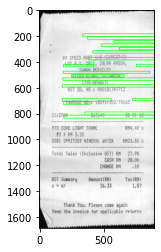

In [13]:
frame = np.array(t(example_img))

inpWidth = inpHeight = 1.0
rW = w / inpWidth
rH = h / inpHeight

for i in range(len(labels)):
    vertices = boxes[0][i].numpy()
    #print(vertices)
    for j in range(len(vertices)):
        print(vertices[j])
        vertices[j][0] = vertices[j][0] * w
        vertices[j][1] = vertices[j][1] * h
        print(vertices[j])

    #for j in range(len(vertices)):
    vertices = np.int0(vertices)
    cv2.drawContours(frame, [vertices], 0, (0, 255, 0), 3)

imgplot = plt.imshow(frame)
plt.show()

In [20]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, n_groups: int = 32):
        super().__init__()
        self.norm1 = nn.GroupNorm(n_groups, in_channels)
        self.act1 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernal_size=(3, 3), padding=(1, 1))
        self.norm2 = nn.GroupNorm(n_groups, out_channels)
        self.act2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernal_size=(3, 3), padding=(1, 1))
        if in_channels != out_channels:
            self.shortcut = nn.Conv2d(in_channel, out_channels, kernal_size=(1, 1))
        else:
            self.shortcut = nn.Idenity()
    
    def foward(self, x):
        h = self.conv1(self.act1(self.norm1(x)))
        h = self.conv2(self.act2(self.norm2(h)))
        return h + self.shortcut(x)

In [22]:
class DownBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            ResidualBlock(in_channels, out_channels)
        )
    
    def foward(self, x):
        return self.maxpool_conv(x)

In [24]:
class UpBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.res = ResidualBlock(in_chnanels + out_channels, out_channels)
    
    def foward(self, x):
        x = self.res(x)
        return x

In [26]:
class MiddleBlock(nn.Module):
    def __init__(self, n_channels: int):
        super().__init__()
        self.res1 = ResidualBlock(n_channels, n_channels)
        self.res2 = ResidualBlock(n_channels, n_channels)
        
    def foward(self, x):
        x = self.res1(x)
        x = self.res2(x)
        return x

In [27]:
class UpSample(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.conv = nn.ConvTranspose2d(n_channels, n_channels, (4, 4), (2, 2), (1, 1))
    
    def foward(x):
        return self.conv(x)

In [28]:
class DownSample(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.conv = nn.Conv2d(n_channels, n_channels, (3, 3), (2, 2), (1, 1))
    
    def foward(x):
        return self.conv(x)

In [30]:
class UNet(nn.Module):
    def __init__(self, image_channels: int = 3, n_channels: int = 64, ch_mults = (1, 2, 2, 4), n_blocks: int = 2):
        super().__init__()
        n_resolutions = len(ch_mults)
        self.image_proj = nn.Conv2d(image_channels, n_channels, kerne_size=(3, 3), padding=(1, 1))
        down = []
        out_channels = in_channels = n_channels
        for i in range(n_resolutions):
            out_channels = in_channels * ch_mults[i]
            for n_block in n_blocks:
                down.append(DownBlock(in_channels, out_channels, n_channels * 4))
                in_channels = out_channels
            
            if i < n_resolutions - 1:
                down.append(DownSample(in_channels))
        
        self.down = nn.ModuleList(down)
        self.middle = MiddleBlock(out_channels, n_channels * 4,)
        
        up = []
        in_channels = out_channels
        for i in reversed(range(n_resolutions)):
            out_channels = in_channels
            for n_block in n_blocks:
                up.append(UpBlock(in_channels, out_channels, n_channels * 4))
            
            out_channels = in_channels // ch_mults[i]
            up.append(UpBlock(in_channels, out_channels, n_channels * 4))
            in_channels = out_channels
            if i > 0:
                up.append(UpSample(in_channels))
                
        self.up = nn.ModuleList(up)
        self.norm = nn.GroupNorm(8, n_channels)
        self.act = nn.ReLU()
        self.final = nn.Conv2d(in_channels, image_channels, kernel_size=(3, 3), padding=(1, 1))
    
    def foward(self, x):
        x = self.image_proj(x)
        h = [x]
        for m in self.down:
            x = m(x)
            h.append(x)
        
        x = self.middle(x)
        for m in self.up:
            if isinstance(m, Upsample):
                x = m(x)
            else:
                s = h.pop()
                x = torch.cat((x, s), dim=1)
                x = m(x)
                
        return self.final(self.act(self.norm(x)))

In [31]:
def train(model: nn.Module, optimizer, train_loader, 
    val_loader, epochs: int = 20):
    
    pass